In [28]:
# Python Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# TensorFlow Imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Embedding, LSTM

# Reading Spam Detection CSV from Kaggle
Source: [Kaggle SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data 'Spam Dataset')

In [2]:
df = pd.read_csv('Data/kaggle_spam_dataset.csv', encoding='ISO-8859-1')

# Checking Data Format

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Dropping Unneeded Columns

In [4]:
df = df.iloc[:, [0,1]]

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Creating New Labels

In [6]:
df.columns = ['classification', 'text']

# Creating Binary Lables

In [7]:
df['binary_classification'] = df['classification'].map({'ham': 0, 'spam': 1})

In [8]:
df.head()

,classification,text,binary_classification
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
target = df['binary_classification']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: binary_classification, Length: 5572, dtype: int64


# Creating Train/Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], target, test_size=0.2)

# Tokenize Text Messages

In [16]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

# Mapping Words to Indices

In [26]:
word2idx = tokenizer.word_index
vocab = len(word2idx)
print('Found %s unique tokens.' % vocab)

Found 7863 unique tokens.


# Pad Sequences

In [21]:
# Find max sequence length to pad
pad_len = data_train.shape[1]
print('Max sequence length: %d' % pad_len)

Max sequence length: 189


In [22]:
# Ensure data has structure Samples x Sequences (N x T)
data_train = pad_sequences(sequences_train)
data_test = pad_sequences(sequences_test, maxlen=pad_len)

# Build Model Architecture

In [31]:
def build_LSTM(embed_dims, lstm_dims, dense_dims):
  i = Input(shape=(pad_len,))
  x = Embedding(vocab+1, embed_dims)(i)
  x = LSTM(lstm_dims, return_sequences=True)(x)
  x = GlobalMaxPooling1D()(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(i, x)
  return model

In [32]:
model = build_LSTM(32, 64, 32)

# Compile Model

In [33]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train Model

In [34]:
r = model.fit(
    data_train,
    y_train,
    epochs=10,
    validation_data=(data_test, y_test)
)

Epoch 1/10
140/140 [==============================] - 19s 110ms/step - loss: 0.4296 - accuracy: 0.8575 - val_loss: 0.3737 - val_accuracy: 0.8726
Epoch 2/10
140/140 [==============================] - 10s 70ms/step - loss: 0.2188 - accuracy: 0.9201 - val_loss: 0.0393 - val_accuracy: 0.9919
Epoch 3/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0311 - accuracy: 0.9926 - val_loss: 0.0345 - val_accuracy: 0.9901
Epoch 4/10
140/140 [==============================] - 3s 20ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0348 - val_accuracy: 0.9901
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0312 - val_accuracy: 0.9919
Epoch 6/10
140/140 [==============================] - 3s 19ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0309 - val_accuracy: 0.9919
Epoch 7/10
140/140 [==============================] - 2s 17ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0394 - val_accuracy: 0.9

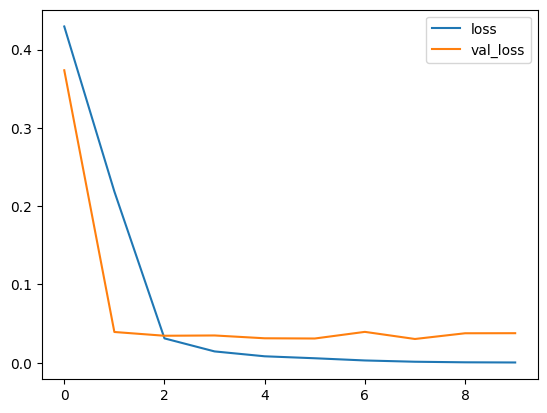

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

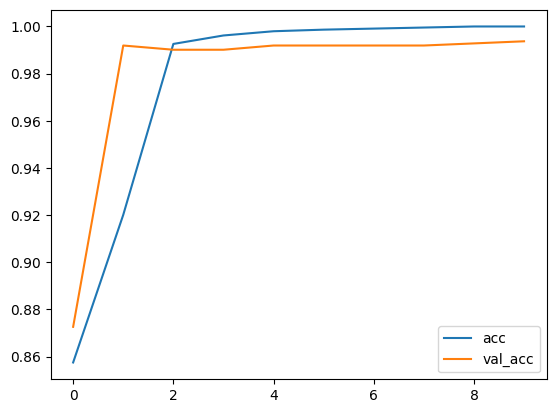

In [36]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()